# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here

In [ ]:
pip install palmerpenguins

In [15]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [3]:
penguins = load_penguins()
penguins= penguins.dropna()

In [4]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

# Model 1

In [182]:
# Define X and y for model 1
X = penguins.drop("bill_depth_mm", axis=1)  # you need to add 2 brackets since it is a pandas data frame
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # always specify the test size

In [183]:
# model 1
my_pipeline = Pipeline([("Dummify everything",ct), ("ols",lr)])

In [184]:
my_pipeline

Pipeline(steps=[('Dummify everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species'])])),
                ('ols', LinearRegression())])

In [185]:
fitted = my_pipeline.fit(X_train, y_train) # many values means too many columns


In [186]:
y_test_preds1= fitted.predict(X_test)

In [187]:
y_train_preds1= fitted.predict(X_train)

In [191]:
train_r2_1 = r2_score(y_train, y_train_preds1)
test_r2_1 = r2_score(y_test, y_test_preds1)

In [192]:
train_r2_1

0.6927516765098407

In [193]:
test_r2_1

0.6128789397606343

# Model 2

In [127]:
# Define X and y for model 2
X = penguins[["island"]]  # you need to add 2 brackets since it is a pandas data frame
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # always specify the test size

In [128]:
X_train

,island
167,Biscoe
259,Biscoe
240,Biscoe
213,Biscoe
197,Biscoe
...,...
51,Biscoe
31,Dream
53,Biscoe
188,Biscoe


In [129]:
# prepping your preprocessing
lr = LinearRegression() # create lieanr object
enc= OneHotEncoder()
ct = ColumnTransformer(
    [("dummify_island", enc, ["island"])]
)

In [130]:
# model 2
my_pipeline2 = Pipeline([("Dummify everything",ct), ("ols",lr)])

In [131]:
fitted2 = my_pipeline2.fit(X_train, y_train)

In [132]:
y_preds2= fitted2.predict(X_test)

In [133]:
y_train_preds2 = fitted2.predict(X_train)

In [134]:
train_r2_2 = r2_score(y_train, y_train_preds2)
test_r2_2 = r2_score(y_test, y_preds2)

In [135]:
train_r2_2

0.39977850095779355

In [136]:
test_r2_2

0.3417420979601493

# Model 3

In [137]:
# Define X and y for model 3
X = penguins[["island","species","bill_length_mm"]]  # you need to add 2 brackets since it is a pandas data frame
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # always specify the test size

In [138]:
X_train

,island,species,bill_length_mm
311,Dream,Chinstrap,47.5
6,Torgersen,Adelie,38.9
160,Biscoe,Gentoo,43.3
159,Biscoe,Gentoo,46.7
104,Biscoe,Adelie,37.9
...,...,...,...
307,Dream,Chinstrap,54.2
33,Dream,Adelie,40.9
165,Biscoe,Gentoo,48.4
113,Biscoe,Adelie,42.2


In [139]:
# prepping your preprocessing
lr = LinearRegression() # create lieanr object
enc= OneHotEncoder()
ct= ColumnTransformer(
    [("dummify_s", enc,["species"]),  # put everything you want to dummify into a list
    ("dummify_i", enc,["island"])])

In [140]:
# model 2
my_pipeline3 = Pipeline([("Dummify everything",ct), ("ols",lr)])

In [141]:
fitted3 = my_pipeline3.fit(X_train, y_train)

In [142]:
y_preds3= fitted3.predict(X_test)

In [143]:
y_train_preds3 = fitted3.predict(X_train)

In [144]:
train_r2_3 = r2_score(y_train, y_train_preds3)
train_r2_3

0.6726865600097618

In [145]:
test_r2_3 = r2_score(y_test, y_preds3)
test_r2_3

0.6616749162361013

# Model 4

In [146]:
# Define X and y for model 4
X = penguins[["species","bill_length_mm","flipper_length_mm","body_mass_g"]]  # you need to add 2 brackets since it is a pandas data frame
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # always specify the test size

In [147]:
X_train

,species,bill_length_mm,flipper_length_mm,body_mass_g
258,Gentoo,41.7,210.0,4700.0
127,Adelie,41.5,195.0,4300.0
206,Gentoo,46.5,217.0,4900.0
26,Adelie,40.6,183.0,3550.0
337,Chinstrap,46.8,189.0,3650.0
...,...,...,...,...
223,Gentoo,46.4,221.0,5000.0
195,Gentoo,49.6,216.0,4750.0
245,Gentoo,49.5,224.0,5650.0
242,Gentoo,47.5,218.0,4950.0


In [148]:
# prepping your preprocessing
lr = LinearRegression() # create lieanr object
enc= OneHotEncoder()
ct= ColumnTransformer(
    [("dummify_s", enc,["species"])])

In [149]:
# model 2
my_pipeline4 = Pipeline([("Dummify everything",ct), ("ols",lr)])

In [150]:
fitted4 = my_pipeline4.fit(X_train, y_train)

In [151]:
y_preds4= fitted4.predict(X_test)

In [152]:
y_train_preds4 = fitted4.predict(X_train)

In [153]:
train_r2_4 = r2_score(y_train, y_train_preds4)
train_r2_4

0.7034286837920762

In [154]:
test_r2_4 = r2_score(y_test, y_preds4)
test_r2_4

0.5885222750536898

# Graph

In [156]:
import pandas as pd

In [194]:
data = pd.DataFrame({
    'Num_Predictors': [8, 1, 3, 4],
    'Train_R2': [train_r2_1, train_r2_2, train_r2_3, train_r2_4],
    'Test_R2': [test_r2_1, test_r2_2, test_r2_3, test_r2_4]
})
data

,Num_Predictors,Train_R2,Test_R2
0,8,0.692752,0.612879
1,1,0.399779,0.341742
2,3,0.672687,0.661675
3,4,0.703429,0.588522


In [195]:
data.to_csv('data.csv')

from google.colab import files
files.download('data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

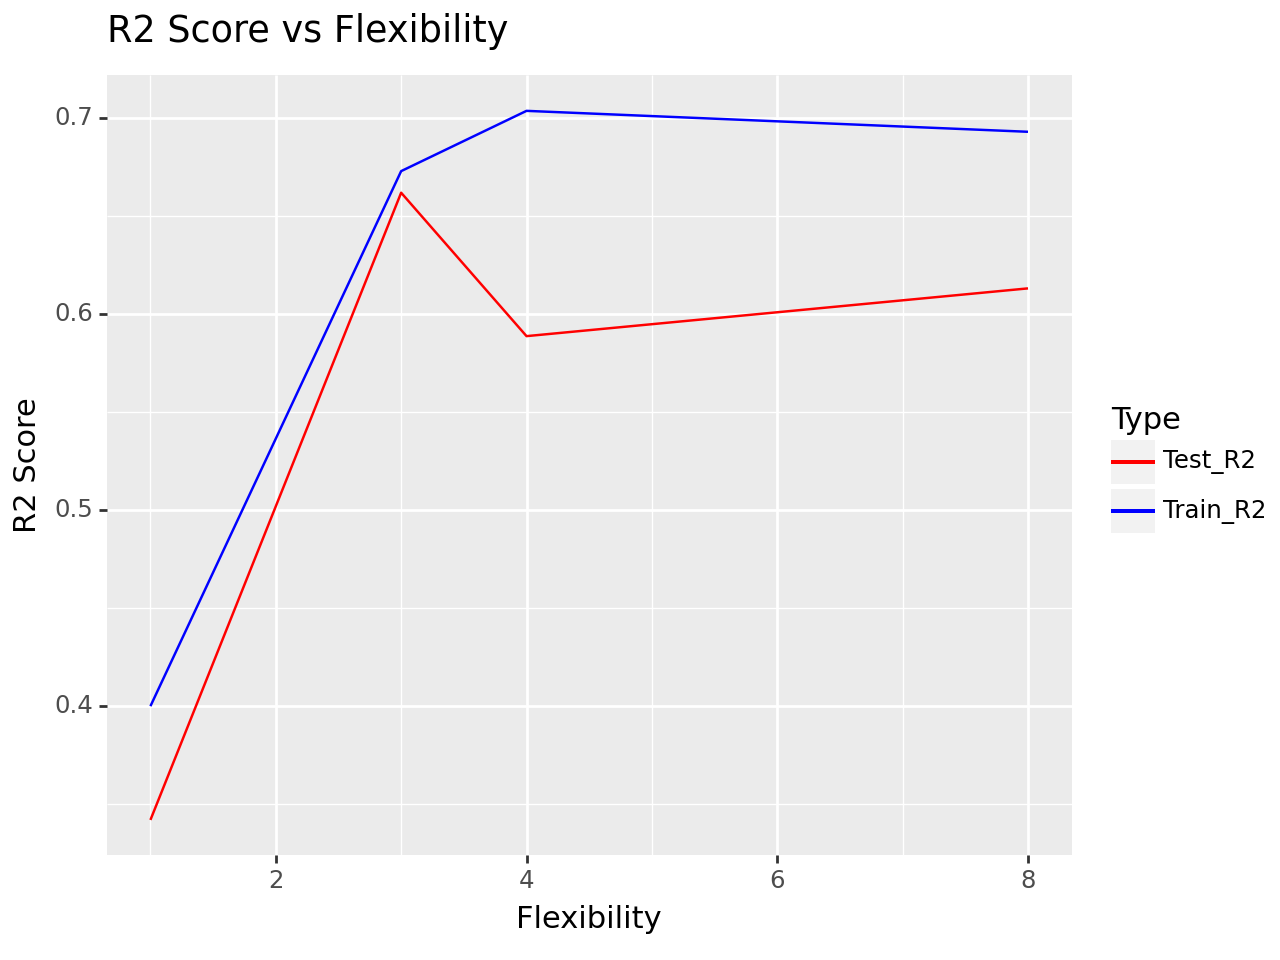

<Figure Size: (640 x 480)>

In [199]:

data_long = pd.melt(data, id_vars='Num_Predictors', value_vars=['Train_R2', 'Test_R2'], var_name='Type', value_name='R2')

plot = (ggplot(data_long, aes(x='Num_Predictors', y='R2', color='Type'))
        + geom_line()
        + labs(title='R2 Score vs Flexibility', y='R2 Score', x='Flexibility')
        + scale_color_manual(values={'Train_R2': 'blue', 'Test_R2': 'red'})
        )

plot


As we add more predictors to our model, it gets better at explaining the data, up to a point. With three predictors, our model does a great job on both the training and test data. However, when we add more than three predictors, the model starts to fit the training data too closely and performs worse on new, unseen data (the test data). This suggests that three predictors is the sweet spot for our model, giving us the best balance between accuracy and the ability to generalize to new data.